In [1]:
#loading pandas package to load and clean the data
import pandas as pd
#importing libraries needed for regression and visualization
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


During this lab we will work with American community servey and crime data to establish and visualize relations between wealth, population and crime on different spatial scales, including county, state and city.

### Loading Demographics data (American Community Servey Data) obtained from the social explorer

In [2]:
demographics = pd.read_csv('data/acs2014/R11460953_SL050.csv')
demographics.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,Geo_PUMA1,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,SE_T003_002,SE_T003_003,SE_T057_001,SE_T083_001
0,1001,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",al,50,0,ACSSF,13,NaN,...,NaN,55136,55136,92.75346,594.436089,604.3882,594.4361,9.952067,52475,24644
1,1003,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",al,50,0,ACSSF,14,NaN,...,NaN,191205,191205,120.27100,1589.784070,2027.3110,1589.7840,437.527200,50183,26851
2,1005,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",al,50,0,ACSSF,15,NaN,...,NaN,27119,27119,30.64722,884.876304,904.5153,884.8763,19.638980,35634,17350
3,1007,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",al,50,0,ACSSF,16,NaN,...,NaN,22653,22653,36.38555,622.582332,626.1689,622.5823,3.586525,37984,18110
4,1009,05000US01009,"Blount County, Alabama","Blount County, Alabama",al,50,0,ACSSF,17,NaN,...,NaN,57645,57645,89.40315,644.775905,650.6282,644.7759,5.852321,44409,20501


Selecting requisite data from the dataframe and renaming the columns

In [3]:
demographics.columns

Index([u'Geo_FIPS', u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_STUSAB',
       u'Geo_SUMLEV', u'Geo_GEOCOMP', u'Geo_FILEID', u'Geo_LOGRECNO',
       u'Geo_US', u'Geo_REGION', u'Geo_DIVISION', u'Geo_STATECE', u'Geo_STATE',
       u'Geo_COUNTY', u'Geo_COUSUB', u'Geo_PLACE', u'Geo_PLACESE',
       u'Geo_TRACT', u'Geo_BLKGRP', u'Geo_CONCIT', u'Geo_AIANHH',
       u'Geo_AIANHHFP', u'Geo_AIHHTLI', u'Geo_AITSCE', u'Geo_AITS',
       u'Geo_ANRC', u'Geo_CBSA', u'Geo_CSA', u'Geo_METDIV', u'Geo_MACC',
       u'Geo_MEMI', u'Geo_NECTA', u'Geo_CNECTA', u'Geo_NECTADIV', u'Geo_UA',
       u'Geo_UACP', u'Geo_CDCURR', u'Geo_SLDU', u'Geo_SLDL', u'Geo_VTD',
       u'Geo_ZCTA3', u'Geo_ZCTA5', u'Geo_SUBMCD', u'Geo_SDELM', u'Geo_SDSEC',
       u'Geo_SDUNI', u'Geo_UR', u'Geo_PCI', u'Geo_TAZ', u'Geo_UGA',
       u'Geo_BTTR', u'Geo_BTBG', u'Geo_PUMA5', u'Geo_PUMA1', u'SE_T001_001',
       u'SE_T002_001', u'SE_T002_002', u'SE_T002_003', u'SE_T003_001',
       u'SE_T003_002', u'SE_T003_003', u'SE_T057_001', u

In [4]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [5]:
demographics.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851
2,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",5,27119,30.64722,884.876304,35634,17350
3,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110
4,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501


In [6]:
#extract state number for future use
demographics['Geo_STATE']=demographics['Geo_GEOID'].apply(lambda x: x[-5:-3])

In [7]:
demographics.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Geo_STATE
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,01
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,01
2,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",5,27119,30.64722,884.876304,35634,17350,01
3,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,01
4,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,01


In [8]:
#check the total population in the data
sum(demographics.Population)

317746049

In [9]:
#add cumulative city income
demographics['Income']=demographics.Population*demographics['Per capita income']

### Loading crime data (FBI 2014 estimates) obtained from social explorer

In [10]:
crime2014 = pd.read_csv('data/crime2014/R11460954_SL050.csv')
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,...,SE_T006_001,SE_T006_002,SE_T006_003,SE_T006_004,SE_T007_001,SE_T007_002,SE_T007_003,SE_T007_004,SE_T008_001,SE_T009_001
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,870.114631,...,414,170.0,199.0,45.0,747.359870,306.886903,359.238198,81.234768,NaN,NaN
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,379.789217,...,662,230.0,405.0,27.0,330.816397,114.936210,202.387675,13.492512,NaN,NaN
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128,539.294083,...,128,68.0,55.0,5.0,476.066501,252.910328,204.559824,18.596348,NaN,NaN
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,382.120323,...,82,42.0,34.0,6.0,364.347285,186.616902,151.070826,26.659557,NaN,NaN
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1755.054661,...,923,311.0,524.0,88.0,1599.126804,538.817374,907.846636,152.462794,NaN,NaN


In [11]:
crime2014.columns

Index([u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY',
       u'SE_T001_001', u'SE_T002_001', u'SE_T002_002', u'SE_T002_003',
       u'SE_T003_001', u'SE_T003_002', u'SE_T003_003', u'SE_T004_001',
       u'SE_T004_002', u'SE_T004_003', u'SE_T004_004', u'SE_T004_005',
       u'SE_T004_006', u'SE_T005_001', u'SE_T005_002', u'SE_T005_003',
       u'SE_T005_004', u'SE_T005_005', u'SE_T005_006', u'SE_T006_001',
       u'SE_T006_002', u'SE_T006_003', u'SE_T006_004', u'SE_T007_001',
       u'SE_T007_002', u'SE_T007_003', u'SE_T007_004', u'SE_T008_001',
       u'SE_T009_001'],
      dtype='object')

In [12]:
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent Crimes', 'Property Crimes']]

In [13]:
#the dataset does not cover entire country
sum(crime2014.Population)

250424654.0

In [14]:
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923


#### Merging dataframes on GeoID (GeoID is used to uniquely identify a geographical location by the census bureau) for further analysis where crime and demographics are needed together

In [15]:
demographics['Geo_FIPS'] = demographics.Geo_GEOID.apply(lambda x: x[-5:]) #ensure consistent formatting of the geo id
df = pd.merge(demographics, crime2014, on='Geo_FIPS', how='inner') 
df.head()

,Geo_GEOID,Geo_NAME_x,Geo_QName,Geo_COUNTY_x,Population_x,Population Density,Area,Median household income,Per capita income,Geo_STATE_x,Income,Geo_FIPS,Geo_NAME_y,Geo_QNAME,Geo_STATE_y,Geo_COUNTY_y,Population_y,Crimes,Violent Crimes,Property Crimes
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,01,1358771584,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,01,5134045455,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662
2,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",5,27119,30.64722,884.876304,35634,17350,01,470514650,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128
3,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,01,410245830,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82
4,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,01,1181780145,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923


In [16]:
#select filed needed for the analysis
df=df[['Population_x','Area','Crimes','Violent Crimes','Property Crimes','Income', 'Per capita income']]
df.rename(columns = { 'Population_x' : 'Population' }, inplace=True)
df.head()

,Population,Area,Crimes,Violent Crimes,Property Crimes,Income,Per capita income
0,55136,594.436089,482,68,414,1358771584,24644
1,191205,1589.784070,760,98,662,5134045455,26851
2,27119,884.876304,145,17,128,470514650,17350
3,22653,622.582332,86,4,82,410245830,18110
4,57645,644.775905,1013,90,923,1181780145,20501


## Q1. Relations between Crime, Wealth and Density (county-level)

### Q1.1. Run a linear regression of total Crime and total Income against population (without intercept). Visulize the data (scatter plots) and regression fit

In [17]:
lm = smf.ols('Income ~ Population - 1', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.021e+05
Date:                Mon, 02 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:33:07   Log-Likelihood:                -57430.
No. Observations:                2541   AIC:                         1.149e+05
Df Residuals:                    2540   BIC:                         1.149e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Population  2.921e+04     91.424    319.523      0.000       2.9e+04  2.94e+04
==============================================================================
Omnibus:                     2707.503   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           831653.816
Skew:                           4.701   Prob(JB):                         0.00
Kurtosis:                      91.129   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

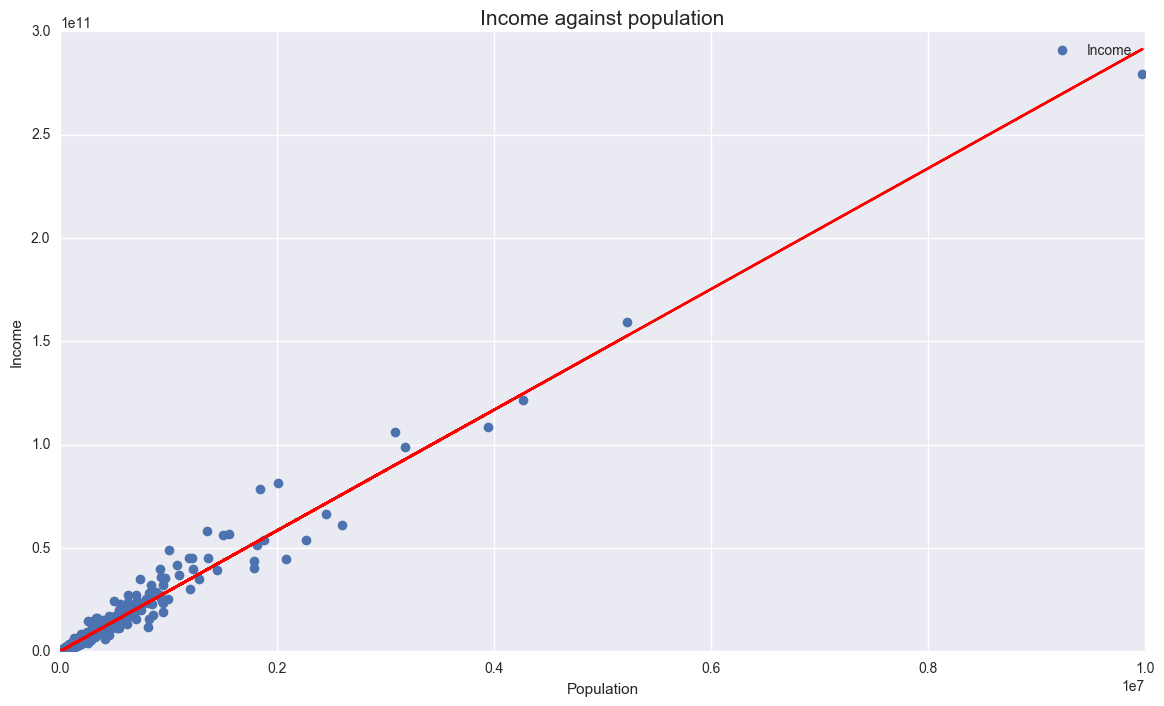

In [18]:
#Visualizing the data using a scatter plot to perform perliminary visual inspection on the dataset
plt.figure(figsize=(14,8))
plt.plot( df['Population'], df['Income'], 'o')
plt.title('Income against population', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Income')
plt.plot(df['Population'], lm.predict(), '-r')
plt.legend()

In [19]:
lm = smf.ols('Crimes ~ Population-1', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Crimes   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     1382.
Date:                Mon, 02 Oct 2017   Prob (F-statistic):          6.41e-242
Time:                        21:33:07   Log-Likelihood:                -22484.
No. Observations:                2541   AIC:                         4.497e+04
Df Residuals:                    2540   BIC:                         4.498e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Population     0.0036   9.73e-05     37.176      0.000         0.003     0.004
==============================================================================
Omnibus:                     4424.139   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8108949.139
Skew:                          11.688   Prob(JB):                         0.00
Kurtosis:                     278.760   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

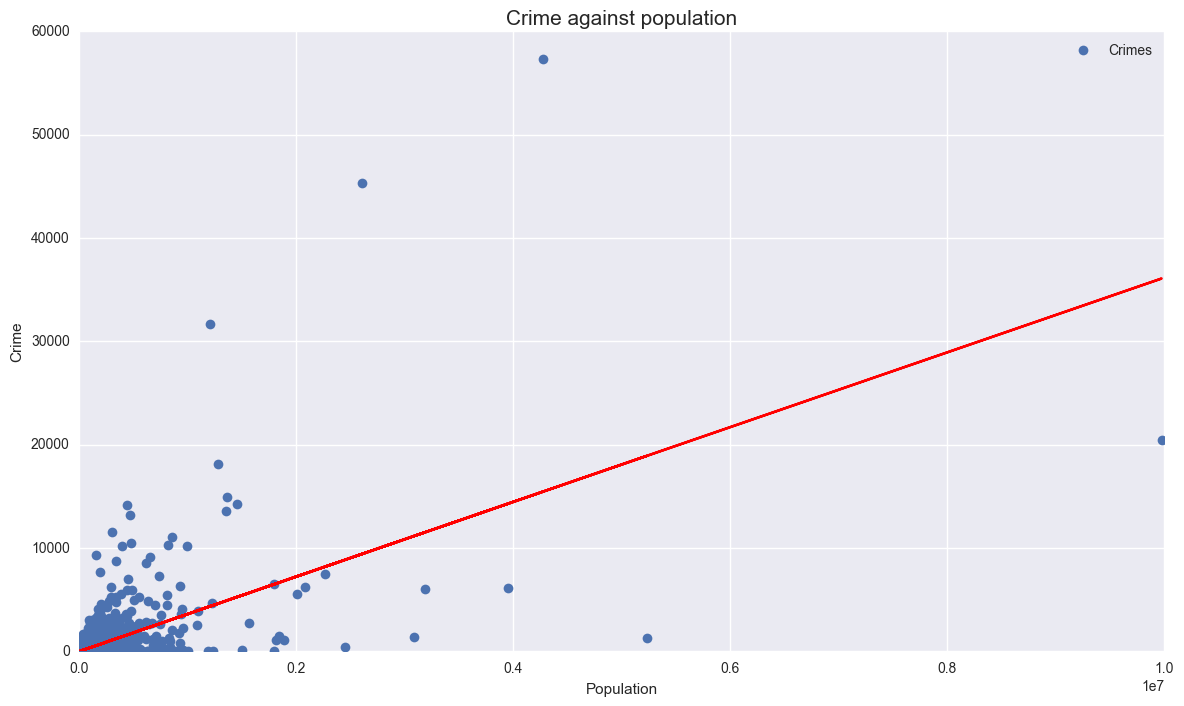

In [20]:
#Visualizing the data using a scatter plot to perform perliminary visual inspection on the dataset
plt.figure(figsize=(14,8))
plt.plot(df['Population'], df['Crimes'], 'o')
plt.title('Crime against population', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Crime')
plt.plot(df['Population'], lm.predict(), '-r')
plt.legend()

### Q1.2. Analyze correlations between income per capita, population density, crime per capita, fraction of violent crime

In [21]:
#prepare data
PopDens = df['Population']/df['Area']
Wealth = df['Per capita income']
CrimeDens = df['Crimes']/df['Population']
ViolentFrac = df['Violent Crimes']/df['Crimes']
data = pd.DataFrame(data=[PopDens, Wealth, CrimeDens, ViolentFrac]).T
data.columns = [ 'PopDens', 'Wealth', 'CrimeDens', 'ViolentFrac']
data.head()

,PopDens,Wealth,CrimeDens,ViolentFrac
0,92.753453,24644.0,0.008742,0.141079
1,120.271050,26851.0,0.003975,0.128947
2,30.647221,17350.0,0.005347,0.117241
3,36.385549,18110.0,0.003796,0.046512
4,89.403155,20501.0,0.017573,0.088845


In [22]:
data.corr()

,PopDens,Wealth,CrimeDens,ViolentFrac
PopDens,1.000000,0.288002,-0.111952,0.090974
Wealth,0.288002,1.000000,-0.154574,-0.012277
CrimeDens,-0.111952,-0.154574,1.000000,-0.126602
ViolentFrac,0.090974,-0.012277,-0.126602,1.000000


## Q2 Visualize characteristics of states
### Q2.1 Visualize income and population density per state

Aggregate demographics data per state

In [23]:
states = demographics.groupby(by='Geo_STATE').sum().loc[:,[u'Population', u'Area', \
                                                 u'Income']]

states.reset_index(inplace=True)

In [24]:
states.head()

,Geo_STATE,Population,Area,Income
0,01,4817678,50645.326381,115316134026
1,02,728300,570640.949601,24128028977
2,04,6561516,113594.083902,167558784896
3,05,2947036,52035.476971,66589385271
4,06,38066920,155779.218854,1138429083472


In [25]:
#function for vusualizing spatial data (heatmap)
#import libraries for handing shapefiles
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

sf = shp.Reader('data/USA_adm/USA_states_reduced.shp')
sf_records=sf.records()
sf_shape=sf.shapeRecords()

#for plotting our result
def plot_spatial_distribution(x,t,logscale,n=200):
    # x - quantity to visualize, t - title, n - color granularity
    center=[]
    cmap = plt.cm.cool(np.linspace(0,1,n+1))
    
    if logscale:
      v2=np.log(max(x))
      v1=np.log(min(x))
    else:
      v2=max(x)
      v1=min(x)

    fig = plt.figure(figsize = (15,10)) 
    ax = fig.gca() 
    for s in range(0,len(sf_records)):
            v = x[s]
            if logscale:
              k = int((np.log(v)-v1)/(v2-v1)*n) # for the log-scale
            else:
              k = int(1.0*(v-v1)/(v2-v1)*n)
            c=cmap[k][0:3]

            shape=sf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            temp=[poly.centroid.x,poly.centroid.y,k]
            center.append(temp)

            ax.add_patch(PolygonPatch(poly, fc=c,ec="k", alpha=1, zorder=2 ))
    center=pd.DataFrame(center)
    center.columns=["x","y","z"]
    sc = plt.scatter(center.x, center.y,c=list(center.z),cmap=plt.cm.cool)
    #plt.colorbar(sc)
    plt.title("Spatial distribution of "+t)
    plt.show()

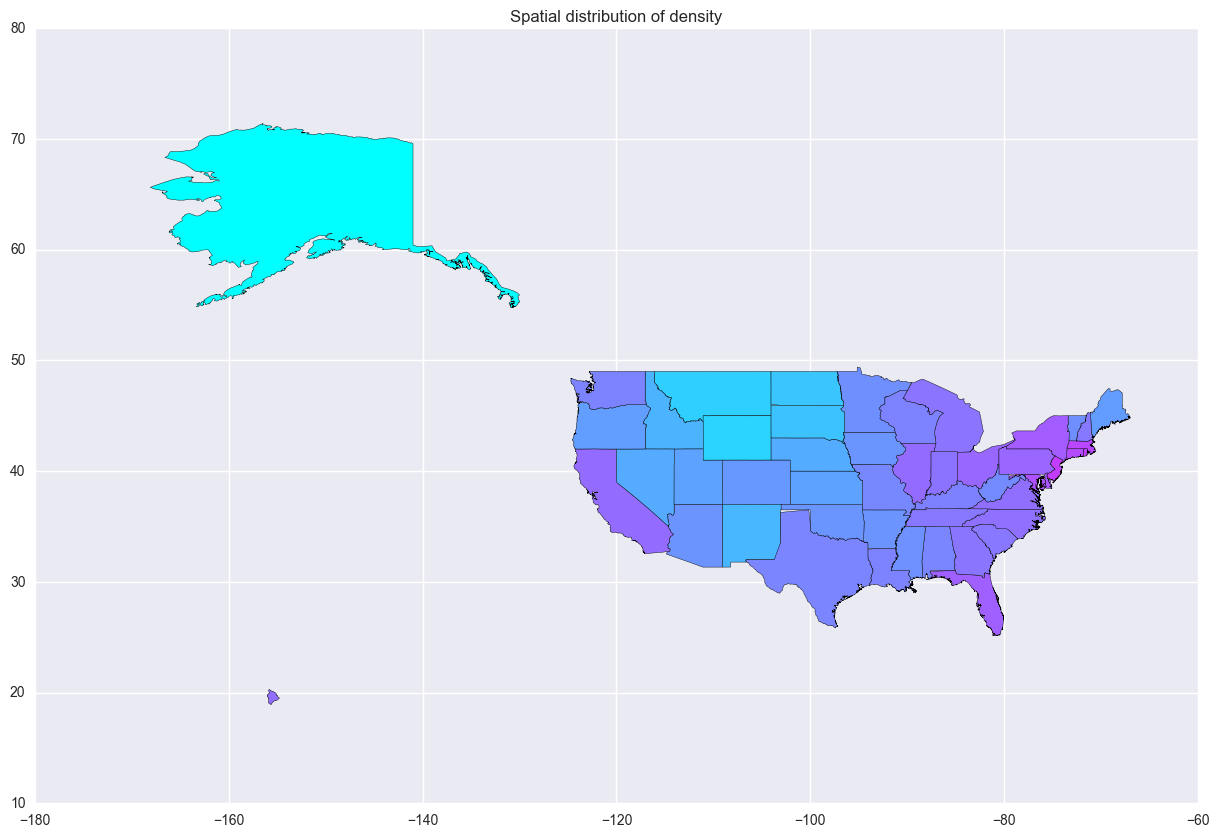

In [26]:
states['Density']=states.Population/states.Area
plot_spatial_distribution(states.Density,'density',1)

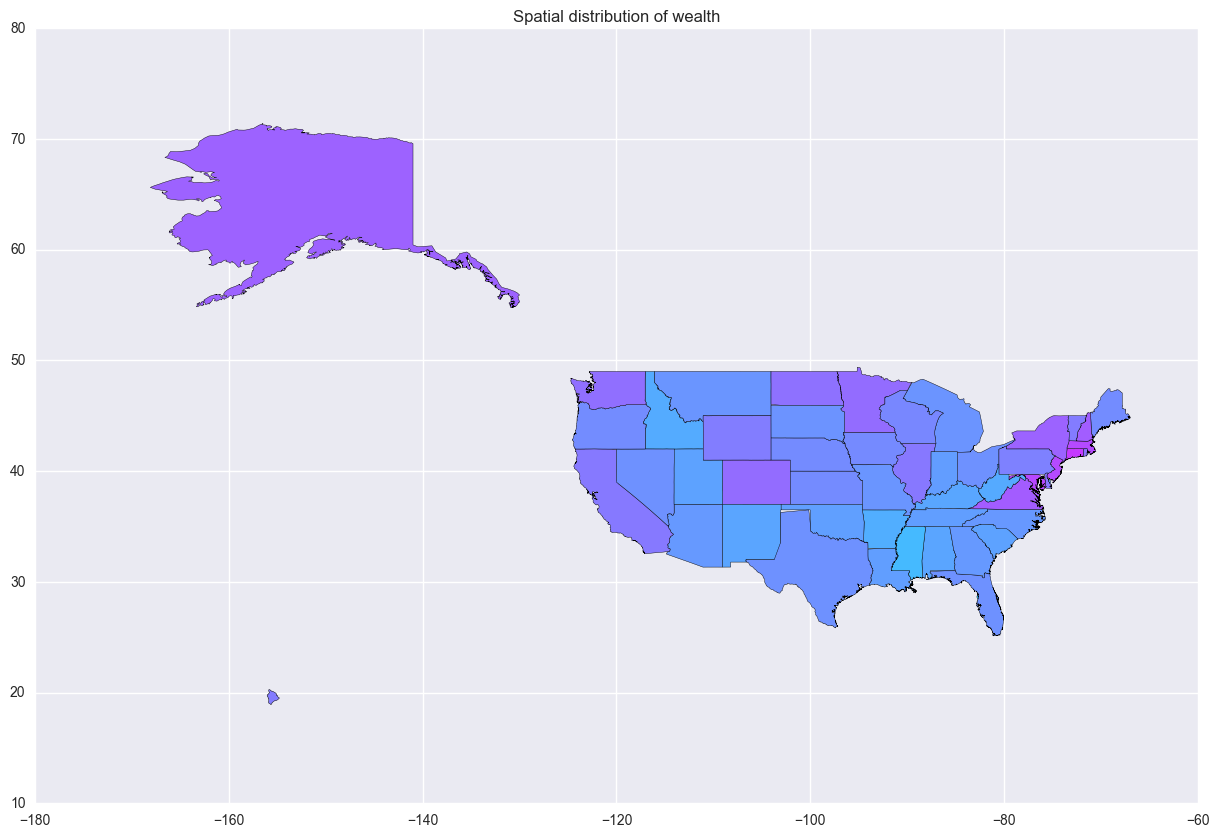

In [27]:
Wealth=states.Income/states.Population
plot_spatial_distribution(Wealth,'wealth',0)

### Q2.2. Report top 5 and last 5 states by population density and income per capita

In [28]:
states.sort_values(by='Density',ascending=False).iloc[0:5]

,Geo_STATE,Population,Area,Income,Density
8,11,633736,61.048425,29469991472,10380.873883
30,34,8874374,7354.220001,322663122147,1206.704994
51,72,3638965,3423.775148,41232200152,1062.851631
39,44,1053252,1033.814215,32402980403,1018.802009
21,25,6657291,7800.058431,242596287223,853.492452


In [29]:
states.sort_values(by='Density',ascending=True).iloc[0:5]

,Geo_STATE,Population,Area,Income,Density
1,02,728300,570640.949601,24128028977,1.276284
50,56,575251,97093.140484,16901582207,5.924734
26,30,1006370,145545.800793,26142870245,6.914456
34,38,704925,69000.798286,21777919317,10.216186
41,46,834708,75810.999612,21962311326,11.010381


### Q2.3. Compute and visualize crime per capita and fraction of violent crimes per state. Report top and last 5 states in each

In [30]:
dfC = pd.merge(demographics, crime2014, on='Geo_FIPS', how='outer') 
stateCrimes = dfC.groupby(by='Geo_STATE_x').sum().loc[:,[u'Population_x', u'Crimes', \
                                                 u'Violent Crimes',u'Property Crimes']]

stateCrimes.reset_index(inplace=True)

In [31]:
stateCrimes

,Geo_STATE_x,Population_x,Crimes,Violent Crimes,Property Crimes
0,01,4817678.0,25879.0,2978.0,22901.0
1,02,728300.0,NaN,NaN,NaN
2,04,6561516.0,25964.0,3047.0,22917.0
3,05,2947036.0,23081.0,3135.0,19946.0
4,06,38066920.0,124462.0,23881.0,100581.0
5,08,5197580.0,18417.0,2398.0,16019.0
6,09,3592053.0,NaN,NaN,NaN
7,10,917060.0,NaN,NaN,NaN
8,11,633736.0,NaN,NaN,NaN
9,12,19361792.0,263212.0,38094.0,225118.0


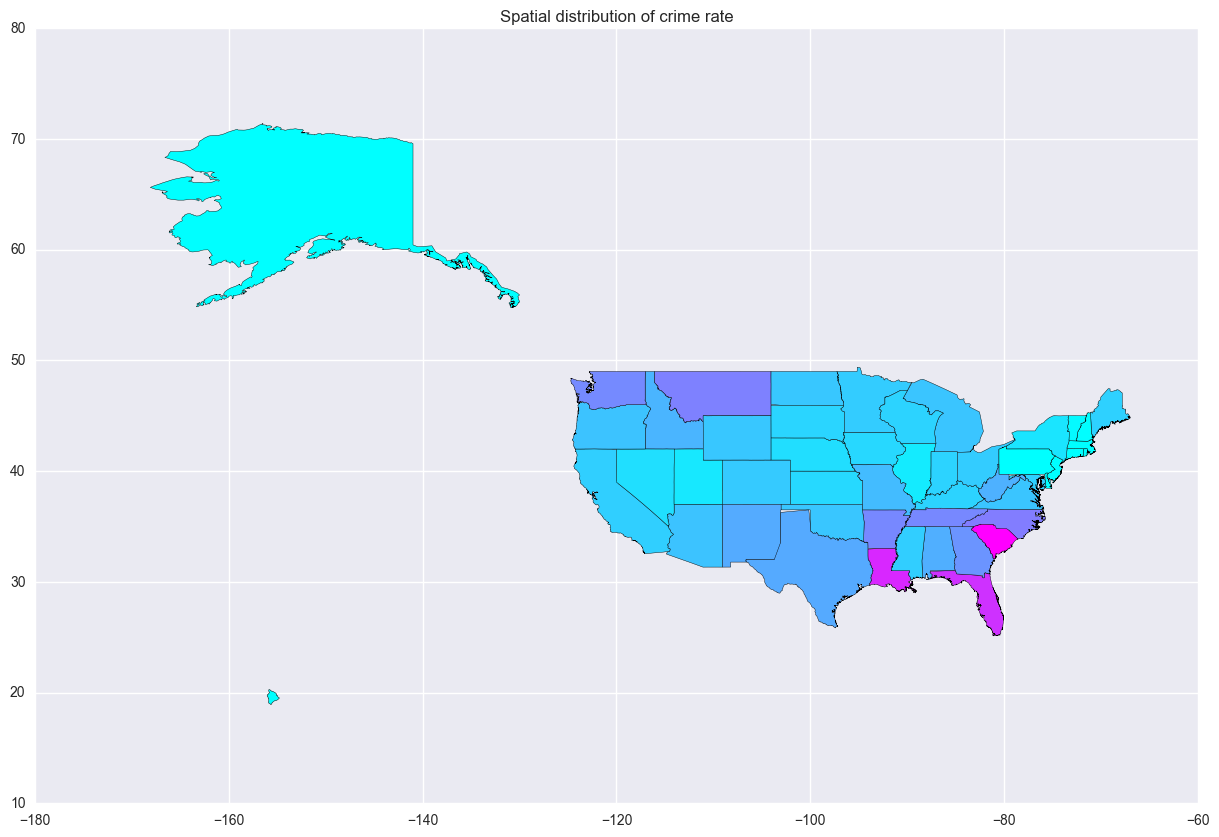

In [32]:
CrimeDensity=stateCrimes.Crimes/stateCrimes.Population_x
CrimeDensity[isnan(CrimeDensity)]=0
#CrimeDensity
plot_spatial_distribution(CrimeDensity,'crime rate',0)

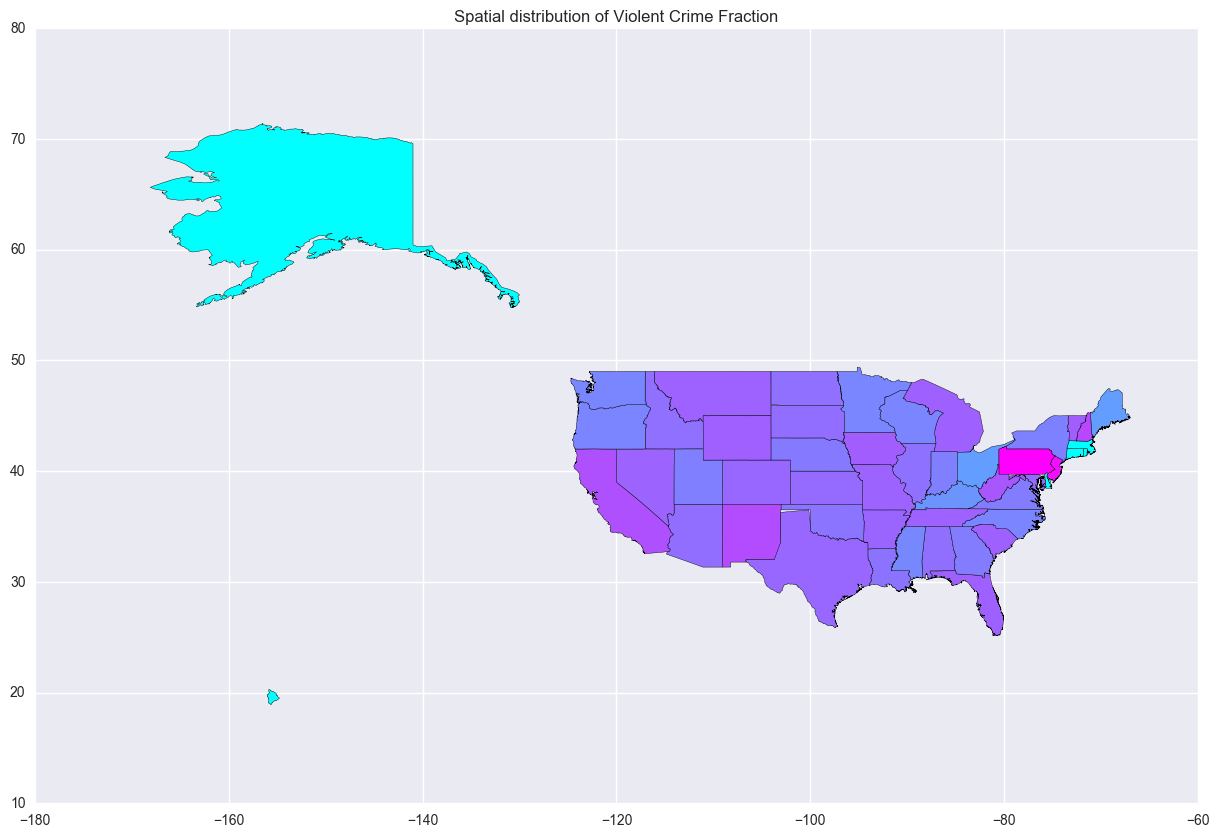

In [33]:
ViolentCrimes=stateCrimes['Violent Crimes']/stateCrimes.Crimes
ViolentCrimes[isnan(ViolentCrimes)]=1e-2
plot_spatial_distribution(ViolentCrimes,'Violent Crime Fraction',1)

## Q3 Urban scaling laws

### Q3.1. Aggregate demographics and crime by MSA (separately)

In [34]:
msa = pd.read_csv('data/msalist.csv')
msa.head()

,msa,msa_name,Geo_FIPS,county
0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX"
1,10180,"Abilene, TX (Metropolitan Statistical Area)",48253,"Jones, TX"
2,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX"
3,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH"
4,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH"


### Q3.2. Establish a scaling relationship $Y\sim C X^q$ between total income and population. Visualize on the log scale. Does $q=1$ fall into the confidence interval?  

In [35]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,"Calhoun County, Alabama",1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [36]:
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]
msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population', u'Crimes', u'Violent Crimes', u'Property Crimes']]

In [37]:
logPop = np.log(msaDemo['Population'])
logIncome = np.log(msaDemo['Income'])
logArea = np.log(msaDemo['Area'])
data = pd.DataFrame(data=[logIncome, logArea, logPop]).T
data.sort_values(by='Income', ascending=False, inplace=True) #Sorting values for better visualization
#data.reset_index(inplace=True, drop=True) #reseting index 
data.head()

,Income,Area,Population
msa,,,
35620,27.297920,9.023314,16.804472
31080,26.677462,8.486415,16.385106
16980,26.425884,8.881392,16.068532
19100,26.019203,9.135378,15.718069
37980,26.009518,8.434268,15.609823


In [38]:
#Performing OLS regression
lm = smf.ols('Income~Population', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.157e+04
Date:                Mon, 02 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:33:16   Log-Likelihood:                 175.13
No. Observations:                 379   AIC:                            -346.3
Df Residuals:                     377   BIC:                            -338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3549      0.092    101.819      0.000         9.174     9.536
Population     1.0633      0.007    146.865      0.000         1.049     1.078
==============================================================================
Omnibus:                       19.243   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.781
Skew:                           0.021   Prob(JB):                     2.10e-12
Kurtosis:                       4.845   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

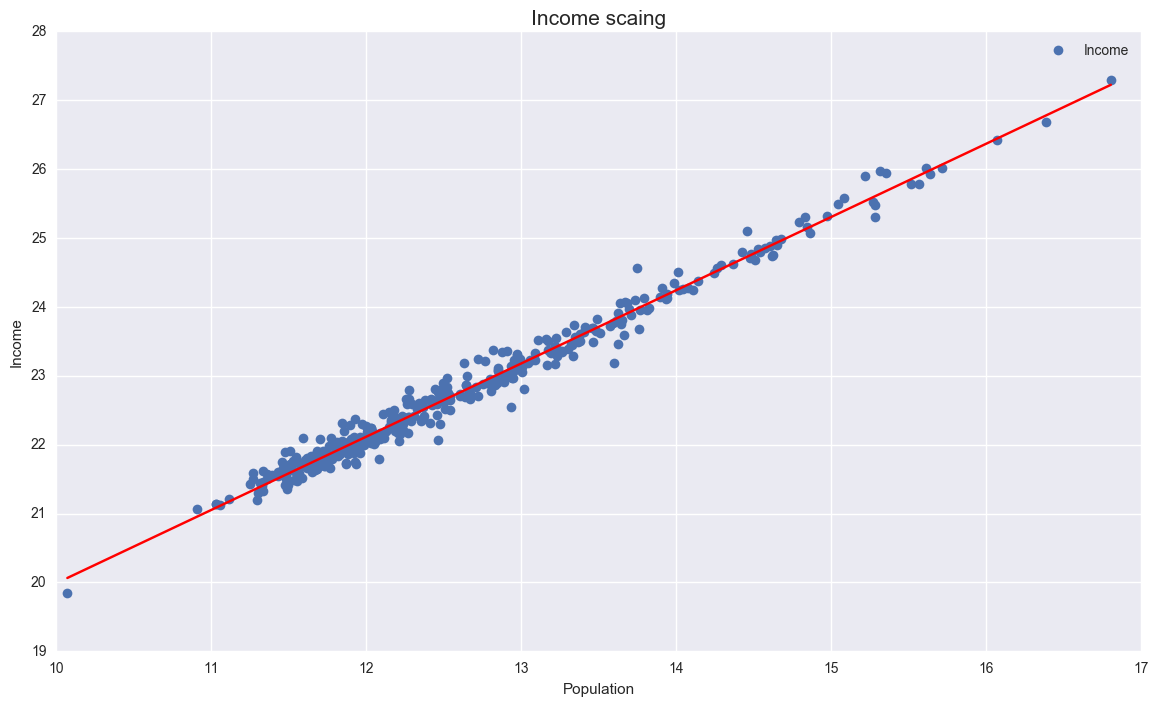

In [39]:
#Visualizing the data using a scatter plot to perform perliminary visual inspection on the dataset
plt.figure(figsize=(14,8))
plt.plot(data['Population'], data['Income'], 'o')
plt.title('Income scaing', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Income')
plt.plot(data['Population'], lm.predict(), '-r')
plt.legend()

### Q3.3. Find the top 5 cities overperforming and underperforming cities by income (by log-scale difference from the trend)

In [40]:
msaDemo['IncRes']=lm.predict()-data['Income']

In [41]:
msaDemo.sort_values(by='IncRes',ascending=False).head(5)

,Population,Area,Income,IncRes
msa,,,,
32580,806447,1570.865088,11713642675,0.632738
15180,415103,890.922380,6184204494,0.565317
29700,259471,3361.482188,3853663292,0.538646
20940,177026,4176.603407,2904819634,0.414732
47300,451108,4824.214846,8069419904,0.387682


In [42]:
msaDemo.sort_values(by='IncRes',ascending=True).head(5)

,Population,Area,Income,IncRes
msa,,,,
14860,934215,624.889555,46419274920,-0.587838
15680,108472,357.180046,3970292144,-0.418566
14500,305166,726.289252,11756214984,-0.404226
12700,215167,393.723227,7953432988,-0.385023
45940,369526,224.557494,14070071976,-0.380407


### Q3.4.Establish a scaling relationship $Y\sim C X^q$ between total, violent and property crime vs population. Visualize on the log scale. Does $q=1$ fall into the confidence interval? Find top 5 and last 5 cities by crime 

In [43]:
logPop = np.log(msaCrime['Population'])
logCrime = np.log(msaCrime['Crimes'])
logPop=logPop
logCrime=logCrime
data = pd.DataFrame(data=[logPop, logCrime]).T
#data.reset_index(inplace=True, drop=True) #reseting index 
data.head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


,Population,Crimes
msa,,
10180,12.035237,6.198479
10420,13.464285,7.781973
10500,11.929462,7.218177
10540,11.689866,6.995766
10580,13.687867,7.371489


In [44]:
#Performing OLS regression
lm = smf.ols('Crimes~Population', data=data[data.Crimes>0]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Crimes   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 02 Oct 2017   Prob (F-statistic):           9.89e-35
Time:                        21:33:17   Log-Likelihood:                -525.93
No. Observations:                 336   AIC:                             1056.
Df Residuals:                     334   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.9840      0.736     -4.056      0.000        -4.431    -1.537
Population     0.8087      0.058     13.836      0.000         0.694     0.924
==============================================================================
Omnibus:                      218.321   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2258.587
Skew:                          -2.598   Prob(JB):                         0.00
Kurtosis:                      14.590   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

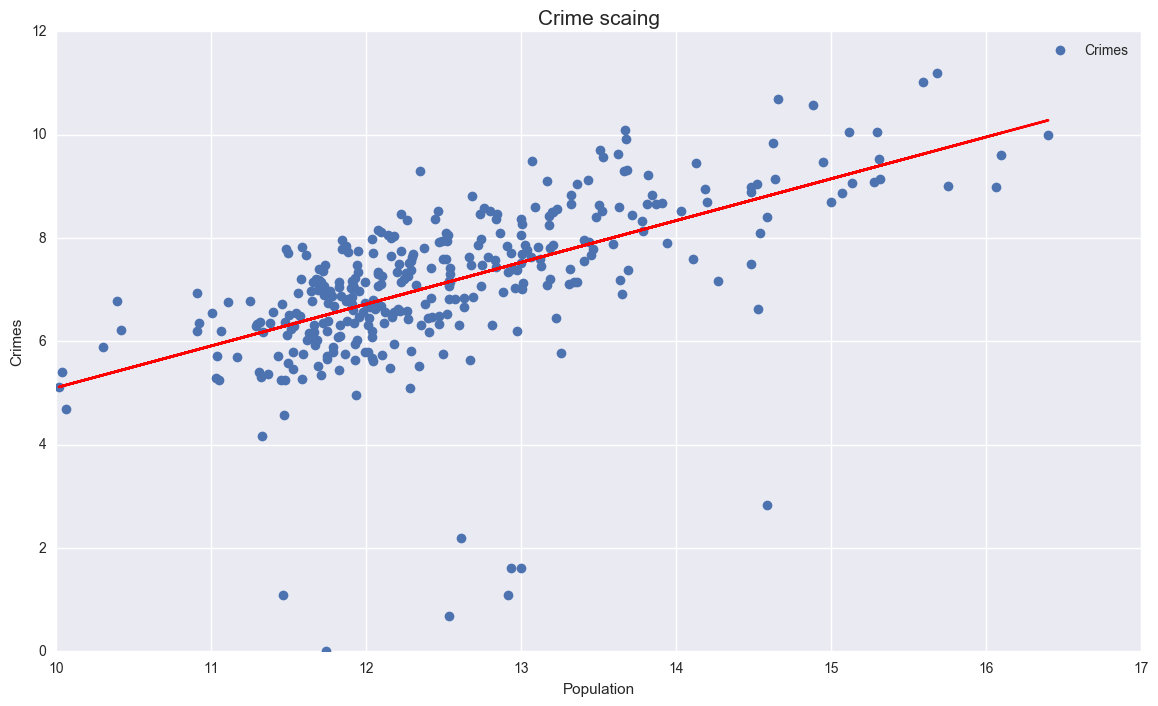

In [45]:
#Visualizing the data using a scatter plot to perform perliminary visual inspection on the dataset
plt.figure(figsize=(14,8))
plt.plot(data['Population'], data['Crimes'], 'o')
plt.title('Crime scaing', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Crimes')
plt.plot(data['Population'][data.Crimes>0], lm.predict(), '-r')
plt.legend()

### Q3.5. Is there any relationship between residual by wealth and residual by crime?

In [46]:
msaCrime['CrimeRes']=data['Crimes']-lm.params.Population*data['Population']-lm.params.Intercept

In [59]:
resdata=pd.merge(msaCrime, msaDemo, left_index=True, right_index=True, how='inner') 

In [72]:
resdata[['IncRes','CrimeRes']][resdata.Crimes>0].corr()

,IncRes,CrimeRes
IncRes,1.000000,0.186369
CrimeRes,0.186369,1.000000


In [73]:
reslm=smf.ols('CrimeRes~IncRes-1',data=resdata[resdata.Crimes>0]).fit()
sreslm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CrimeRes   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     11.84
Date:                Mon, 02 Oct 2017   Prob (F-statistic):           0.000653
Time:                        21:52:30   Log-Likelihood:                -536.33
No. Observations:                 337   AIC:                             1075.
Df Residuals:                     336   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
IncRes         1.5149      0.440      3.441      0.001         0.649     2.381
==============================================================================
Omnibus:                      222.905   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2290.554
Skew:                          -2.669   Prob(JB):                         0.00
Kurtosis:                      14.603   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So it seams that wealthier cities are not safer - those outperforming by wealth also tend to outperform by crime. Correlation is weak, but regression is statistically significant (confidence interval does not contain zero).